<a href="https://colab.research.google.com/github/mleyvaz/Neural-networks/blob/main/Copia_de_benchmarking_Esta_es_la_%C3%BAltima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

## Creación de los datos

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')

In [3]:
df.columns = ['id','clump_thickness','unif_cell_size','unif_cell_shape','marg_adhesion','single_epith_size','bare_nuclei','bland_chrom','norm_nucleoli','mitoses','class']

In [4]:
df.drop(['id'], inplace=True, axis=1)

In [5]:
df.replace('?', -99999, inplace=True)

In [6]:
df['class'] = df['class'].map(lambda x: 1 if x == 4 else 0)

In [7]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1


In [8]:
X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])
X.shape

(698, 9)

In [9]:
scaler = preprocessing.MinMaxScaler()

In [10]:
X = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [12]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.11111111,
       0.99991001, 0.        , 0.        , 0.        ])

## Creacion de nuevas funciones de activación en Keras

In [13]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))
    from keras.utils.generic_utils import get_custom_objects

get_custom_objects().update({'swish': Activation(swish)})

## Creación y entrenamiento del modelo

In [14]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
import tensorflow as tf 

In [15]:
model = Sequential()
model1 = Sequential()
model2 = Sequential()
model3 = Sequential()
model4 = Sequential()

In [16]:
# Sigmoid
model.add(Dense(9, activation='sigmoid', input_shape=(9,)))
model.add(Dense(27, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(54, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(27, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

#Relu
model1.add(Dense(9, activation='relu', input_shape=(9,)))
model1.add(Dense(27, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(54, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(27, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(1, activation='relu'))
# swish
model2.add(Dense(9, activation='swish', input_shape=(9,)))
model2.add(Dense(27, activation='swish'))
model2.add(Dropout(0.25))
model2.add(Dense(54, activation='swish'))
model2.add(Dropout(0.25))
model2.add(Dense(27, activation='swish'))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation='swish'))
# tanh
model3.add(Dense(9, activation='tanh', input_shape=(9,)))
model3.add(Dense(27, activation='tanh'))
model3.add(Dropout(0.25))
model3.add(Dense(54, activation='tanh'))
model3.add(Dropout(0.25))
model3.add(Dense(27, activation='tanh'))
model3.add(Dropout(0.25))
model3.add(Dense(1, activation='tanh'))
# softmax 
model4.add(Dense(9, activation='softmax', input_shape=(9,)))
model4.add(Dense(27, activation='softmax'))
model4.add(Dropout(0.25))
model4.add(Dense(54, activation='softmax'))
model4.add(Dropout(0.25))
model4.add(Dense(27, activation='softmax'))
model4.add(Dropout(0.25))
model4.add(Dense(1, activation='softmax'))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_6 (Dense)              (None, 27)                270       
_________________________________________________________________
dropout_3 (Dropout)          (None, 27)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 54)                1512      
_________________________________________________________________
dropout_4 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 27)                1485      
_________________________________________________________________
dropout_5 (Dropout)          (None, 27)               

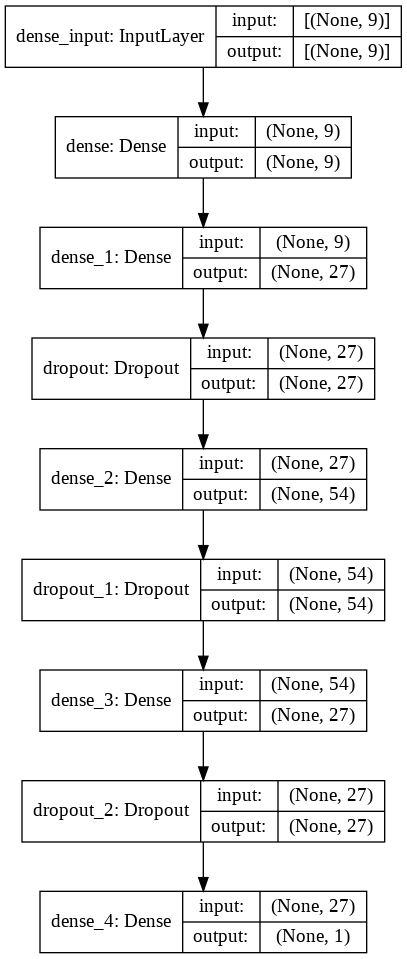

In [17]:

model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_squared_logarithmic_error)
model1.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_squared_logarithmic_error)
model2.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_squared_logarithmic_error)
model3.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_squared_logarithmic_error)
model4.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.mean_squared_logarithmic_error)

from keras.utils.vis_utils import plot_model
print(model1.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
sig=[]
relu=[]
swi=[]
tanh=[]
softmax=[]
for i in range(20):
  model.fit(X_train,y_train,batch_size=64,epochs=5,verbose=1, validation_data=(X_test, y_test))
  model1.fit(X_train,y_train,batch_size=64,epochs=5,verbose=1, validation_data=(X_test, y_test))
  model2.fit(X_train,y_train,batch_size=64,epochs=5,verbose=1, validation_data=(X_test, y_test))
  model3.fit(X_train,y_train,batch_size=64,epochs=5,verbose=1, validation_data=(X_test, y_test))
  model4.fit(X_train,y_train,batch_size=64,epochs=5,verbose=1, validation_data=(X_test, y_test))
  loss = model.evaluate(X_test, y_test, verbose=1, batch_size=30)
  loss1 = model1.evaluate(X_test, y_test, verbose=1, batch_size=30)
  loss2 = model2.evaluate(X_test, y_test, verbose=1, batch_size=30)
  loss3 = model3.evaluate(X_test, y_test, verbose=1, batch_size=30)
  loss4 = model4.evaluate(X_test, y_test, verbose=1, batch_size=30)
  sig.append(100-loss*100)
  relu.append(100-loss1*100)
  swi.append(100-loss2*100)
  tanh.append(100-loss3*100)
  softmax.append(100-loss4*100)

print("Resultado ultima corrida  función Sigmoide {}".format(100-loss*100))
print("Resultado final corrida función ReLu {}".format(100-loss1*100))
print("Resultado final corrida función Swish {}".format(100-loss2*100))
print("Resultado final corrida función Tanh {}".format(100-loss3*100))
print("Resultado final corrida función Softmax {}".format(100-loss4*100))

Epoch 1/5
9/9 [==============================] - 1s 67ms/step - loss: 0.1127 - val_loss: 0.1084
Epoch 2/5
9/9 [==============================] - 0s 24ms/step - loss: 0.1121 - val_loss: 0.1085
Epoch 3/5
9/9 [==============================] - 0s 8ms/step - loss: 0.1104 - val_loss: 0.1083
Epoch 4/5
9/9 [==============================] - 0s 8ms/step - loss: 0.1195 - val_loss: 0.1082
Epoch 5/5
9/9 [==============================] - 0s 7ms/step - loss: 0.1132 - val_loss: 0.1082
Epoch 1/5
9/9 [==============================] - 1s 27ms/step - loss: 0.1651 - val_loss: 0.1438
Epoch 2/5
9/9 [==============================] - 0s 8ms/step - loss: 0.1271 - val_loss: 0.0821
Epoch 3/5
9/9 [==============================] - 0s 7ms/step - loss: 0.0898 - val_loss: 0.0636
Epoch 4/5
9/9 [==============================] - 0s 9ms/step - loss: 0.0739 - val_loss: 0.0546
Epoch 5/5
9/9 [==============================] - 0s 7ms/step - loss: 0.0616 - val_loss: 0.0483
Epoch 1/5
9/9 [==============================] 

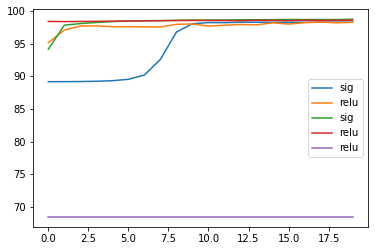

In [19]:
import matplotlib.pyplot as plt
plt.plot(sig, label = 'sig')
plt.plot(relu, label='relu')
plt.plot(swi,  label = 'sig')
plt.plot(tanh, label='relu')
plt.plot(softmax, label='relu')
plt.legend()
plt.show()







In [20]:

#Test stadistico
 
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
 
stat, p = kruskal(sig,relu,swi,tanh,softmax)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=79.183, p=0.000
Probably different distributions
